In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import linear_model
import re
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('ggplot')

In [3]:
airlines = pd.read_csv('airlines.csv')


In [4]:
airlines['Percent delay quartiles'] = pd.qcut(airlines['PerCentage Delay'], 4, ['q1','q2','q3','q4'])

In [5]:
airlines.replace({'Percent delay quartiles': {'q1': 'F', 'q2':'M', 'q3':'M', 'q4':'S'}},inplace=True)


In [6]:
airlines['# Delay per carrier quartiles'] = pd.qcut(airlines['# Delay Per Carrier'], 4, ['q1','q2','q3','q4'])

In [7]:
airlines.replace({'# Delay per carrier quartiles': {'q1': 'F', 'q2':'M', 'q3':'M', 'q4':'S'}}, inplace=True)

In [8]:
airlines['Minutes Per Delayed Flight quartiles'] = pd.qcut(airlines['Minutes Per Delayed Flight'],4,['q1','q2','q3','q4'])

In [9]:
airlines.replace({'Minutes Per Delayed Flight quartiles': {'q1': 'F', 'q2':'M', 'q3':'M', 'q4':'S'}},inplace=True)

In [10]:
airlines.head()

,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Cancelled,Carriers.Total,Code,Delayed,Diverted,Flights.Total,PerCentage Delay,# Delay Per Carrier,Minutes Per Delayed Flight,Label,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Month,Month Name,Name,On Time,Year,Percent delay quartiles,# Delay per carrier quartiles,Minutes Per Delayed Flight quartiles
0,1009,1275,3217,17,328,216,11,ATL,5843,27,30060,0.194378,531.181818,45.997604,2003/06,61606,68335,118831,518,268764,19474,6,June,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",23974,2003,M,S,F
1,374,495,685,3,66,138,14,BOS,1623,3,9639,0.168378,115.928571,47.545903,2003/06,20319,28189,24400,99,77167,4160,6,June,"Boston, MA: Logan International",7875,2003,M,M,F
2,296,477,389,8,78,29,11,BWI,1245,15,8287,0.150235,113.181818,51.791165,2003/06,13635,26810,17556,278,64480,6201,6,June,"Baltimore, MD: Baltimore/Washington Internatio...",6998,2003,F,M,M
3,300,472,735,2,54,73,11,CLT,1562,14,8670,0.180161,142.000000,42.167093,2003/06,14763,23379,23804,127,65865,3792,6,June,"Charlotte, NC: Charlotte Douglas International",7021,2003,M,M,F
4,283,268,487,4,58,74,13,DCA,1100,18,6513,0.168893,84.615385,47.951818,2003/06,13775,13712,20999,120,52747,4141,6,June,"Washington, DC: Ronald Reagan Washington National",5321,2003,M,F,M


In [11]:
airlines['Primary key'] = airlines['Code'].astype('str')+airlines['Month'].astype('str')+airlines['Year'].astype('str')

In [12]:
airlines['Primary key']

0        ATL62003
1        BOS62003
2        BWI62003
3        CLT62003
4        DCA62003
5        DEN62003
6        DFW62003
7        DTW62003
8        EWR62003
9        FLL62003
10       IAD62003
11       IAH62003
12       JFK62003
13       LAS62003
14       LAX62003
15       LGA62003
16       MCO62003
17       MDW62003
18       MIA62003
19       MSP62003
20       ORD62003
21       PDX62003
22       PHL62003
23       PHX62003
24       SAN62003
25       SEA62003
26       SFO62003
27       SLC62003
28       TPA62003
29       ATL72003
30       BOS72003
31       BWI72003
32       CLT72003
33       DCA72003
34       DEN72003
35       DFW72003
36       DTW72003
37       EWR72003
38       FLL72003
39       IAD72003
40       IAH72003
41       JFK72003
42       LAS72003
43       LAX72003
44       LGA72003
45       MCO72003
46       MDW72003
47       MIA72003
48       MSP72003
49       ORD72003
50       PDX72003
51       PHL72003
52       PHX72003
53       SAN72003
54       SEA72003
55       S

In [13]:
quartiles = airlines.groupby(['Minutes Per Delayed Flight quartiles','# Delay per carrier quartiles','Percent delay quartiles'])['Primary key'].count()

In [14]:
quartiles.to_csv('quartiles.csv')

In [15]:
airlines['Airport speed'] = airlines['Percent delay quartiles']
airlines['Airport speed'][(airlines['Minutes Per Delayed Flight quartiles'] == airlines['# Delay per carrier quartiles']) | (airlines['Minutes Per Delayed Flight quartiles']==airlines['Percent delay quartiles'])] = airlines['Minutes Per Delayed Flight quartiles']
airlines['Airport speed'][(airlines['Minutes Per Delayed Flight quartiles'] == airlines['# Delay per carrier quartiles']) | (airlines['# Delay per carrier quartiles'] == airlines['Percent delay quartiles'])] = airlines['# Delay per carrier quartiles']

C:\Users\uthir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\uthir\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
airlines['Airport speed']

0       M
1       M
2       M
3       M
4       M
5       F
6       M
7       F
8       M
9       F
10      F
11      M
12      M
13      M
14      F
15      M
16      M
17      F
18      F
19      F
20      M
21      F
22      M
23      F
24      F
25      M
26      M
27      F
28      F
29      S
30      M
31      M
32      M
33      M
34      M
35      M
36      M
37      M
38      M
39      M
40      M
41      M
42      M
43      M
44      M
45      M
46      M
47      S
48      M
49      S
50      F
51      M
52      M
53      F
54      M
55      M
56      F
57      M
58      S
59      M
60      M
61      M
62      M
63      M
64      M
65      M
66      S
67      S
68      M
69      M
70      S
71      M
72      M
73      S
74      M
75      M
76      S
77      M
78      S
79      F
80      M
81      M
82      F
83      M
84      M
85      M
86      M
87      F
88      F
89      F
90      F
91      F
92      F
93      F
94      F
95      S
96      F
97      F
98      M
99      F


In [17]:
airlines.to_csv('airlineswspeed.csv')

In [18]:
passenger = pd.read_csv('cleaned_airport_passenger.csv')
airlineswspeed = pd.read_csv('airlineswspeed.csv')

In [19]:
airport = pd.merge(airlineswspeed, passenger, on=['Code','Year','Month'], how='left')

In [20]:
airport.head()

,Unnamed: 0,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Cancelled,Carriers.Total,Code,Delayed,Diverted,Flights.Total,PerCentage Delay,# Delay Per Carrier,Minutes Per Delayed Flight,Label,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Month,Month Name,Name,On Time,Year,Percent delay quartiles,# Delay per carrier quartiles,Minutes Per Delayed Flight quartiles,Primary key,Airport speed,DOMESTIC
0,0,1009,1275,3217,17,328,216,11,ATL,5843,27,30060,0.194378,531.181818,45.997604,2003/06,61606,68335,118831,518,268764,19474,6,June,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",23974,2003,M,S,F,ATL62003,M,3171845
1,1,374,495,685,3,66,138,14,BOS,1623,3,9639,0.168378,115.928571,47.545903,2003/06,20319,28189,24400,99,77167,4160,6,June,"Boston, MA: Logan International",7875,2003,M,M,F,BOS62003,M,841934
2,2,296,477,389,8,78,29,11,BWI,1245,15,8287,0.150235,113.181818,51.791165,2003/06,13635,26810,17556,278,64480,6201,6,June,"Baltimore, MD: Baltimore/Washington Internatio...",6998,2003,F,M,M,BWI62003,M,871736
3,3,300,472,735,2,54,73,11,CLT,1562,14,8670,0.180161,142.000000,42.167093,2003/06,14763,23379,23804,127,65865,3792,6,June,"Charlotte, NC: Charlotte Douglas International",7021,2003,M,M,F,CLT62003,M,957352
4,4,283,268,487,4,58,74,13,DCA,1100,18,6513,0.168893,84.615385,47.951818,2003/06,13775,13712,20999,120,52747,4141,6,June,"Washington, DC: Ronald Reagan Washington National",5321,2003,M,F,M,DCA62003,M,595820


In [21]:
airport.rename(columns={'DOMESTIC':'Domestic passengers'},inplace=True)

In [22]:
airport = airport.drop(['Unnamed: 0','Percent delay quartiles','# Delay per carrier quartiles','Minutes Per Delayed Flight quartiles'],axis=1)

In [23]:
airport.dtypes

# of Delays.Carrier                           int64
# of Delays.Late Aircraft                     int64
# of Delays.National Aviation System          int64
# of Delays.Security                          int64
# of Delays.Weather                           int64
Cancelled                                     int64
Carriers.Total                                int64
Code                                         object
Delayed                                       int64
Diverted                                      int64
Flights.Total                                 int64
PerCentage Delay                            float64
# Delay Per Carrier                         float64
Minutes Per Delayed Flight                  float64
Label                                        object
Minutes Delayed.Carrier                       int64
Minutes Delayed.Late Aircraft                 int64
Minutes Delayed.National Aviation System      int64
Minutes Delayed.Security                      int64
Minutes Dela

In [24]:
airport.isnull().sum()

# of Delays.Carrier                         0
# of Delays.Late Aircraft                   0
# of Delays.National Aviation System        0
# of Delays.Security                        0
# of Delays.Weather                         0
Cancelled                                   0
Carriers.Total                              0
Code                                        0
Delayed                                     0
Diverted                                    0
Flights.Total                               0
PerCentage Delay                            0
# Delay Per Carrier                         0
Minutes Per Delayed Flight                  0
Label                                       0
Minutes Delayed.Carrier                     0
Minutes Delayed.Late Aircraft               0
Minutes Delayed.National Aviation System    0
Minutes Delayed.Security                    0
Minutes Delayed.Total                       0
Minutes Delayed.Weather                     0
Month                             

### No missing values in the merged dataset

In [25]:
airport.to_csv('airport.csv',index=False)

In [26]:
year=airport.loc[airport['Year'] == 2015]
year = year.groupby('Name')['Domestic passengers'].sum()

In [27]:
year.sort_values(ascending=False)

Name
Atlanta, GA: Hartsfield-Jackson Atlanta International                  43909249
Chicago, IL: Chicago O'Hare International                              30536332
Dallas/Fort Worth, TX: Dallas/Fort Worth International                 27802912
Los Angeles, CA: Los Angeles International                             26553833
Denver, CO: Denver International                                       25169693
Charlotte, NC: Charlotte Douglas International                         20408070
Phoenix, AZ: Phoenix Sky Harbor International                          20190284
Las Vegas, NV: McCarran International                                  19938837
San Francisco, CA: San Francisco International                         18783715
Seattle, WA: Seattle/Tacoma International                              17955740
Minneapolis, MN: Minneapolis-St Paul International                     16321717
Orlando, FL: Orlando International                                     16269428
Houston, TX: George Bush Interconti

### Top 5 Airports based on Number of Passengers: Atlanta, Chicago, Dallas/Fort Worth, Los Angeles, Denver

In [28]:
delayedflights = airport.loc[airport['Year']==2015]
delayedflights = delayedflights.groupby('Name')['Name','Delayed', 'Flights.Total','Domestic passengers'].sum()

In [29]:
delayedflights.to_csv('delayedflights.csv')

In [30]:
delayflights = pd.read_csv('delayedflights.csv')

In [31]:
sortbypassenger = delayflights.sort_values('Domestic passengers', ascending=False)

In [32]:
top5flightdelays = sortbypassenger.head()

C:\Users\uthir\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


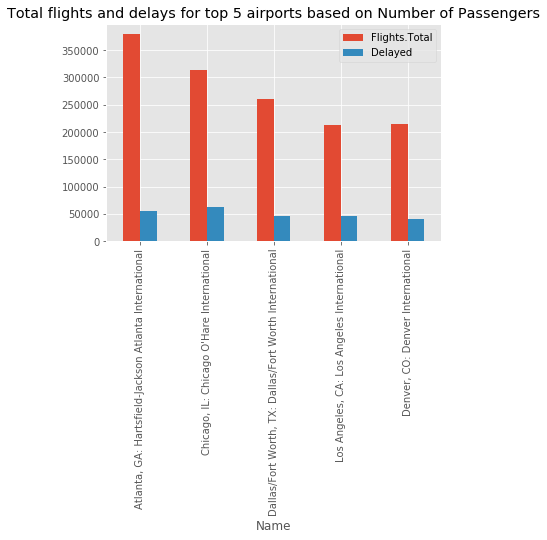

In [33]:
top5flightdelays.plot.bar(x = 'Name', y = ['Flights.Total','Delayed'], title='Total flights and delays for top 5 airports based on Number of Passengers')

In [34]:
bottom5flightdelays = sortbypassenger.tail(n=5)

C:\Users\uthir\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


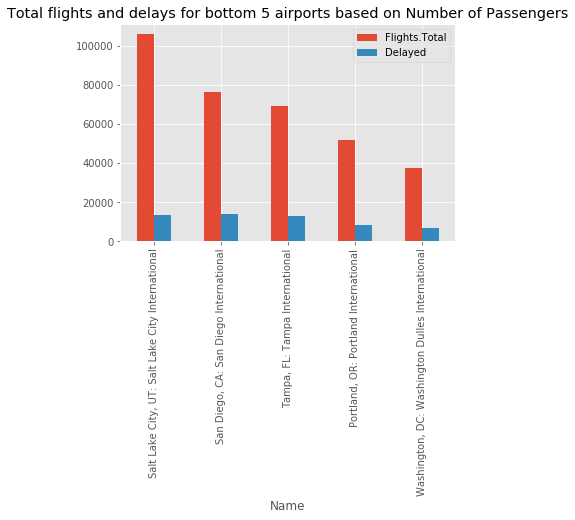

In [35]:
bottom5flightdelays.plot.bar(x = 'Name', y = ['Flights.Total','Delayed'], title='Total flights and delays for bottom 5 airports based on Number of Passengers')

In [36]:
typeofdelays = airport.loc[airport['Year']==2015]
typeofdelays = typeofdelays.groupby('Name')['Name','# of Delays.Carrier', '# of Delays.Late Aircraft','# of Delays.National Aviation System', '# of Delays.Security','# of Delays.Weather','Domestic passengers'].sum()

In [37]:
toptypeofdelay = typeofdelays.sort_values('Domestic passengers', ascending=False).head(n=1)

In [38]:
toptypeofdelay = toptypeofdelay.drop(['Domestic passengers'],axis=1)

In [39]:
toptypeofdelay.head()

,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather
Name,,,,,
"Atlanta, GA: Hartsfield-Jackson Atlanta International",15762,20254,17396,64,1703


(-1.1194757878780366,
 1.1009274184703828,
 -1.1135281947725462,
 1.1094214893323557)

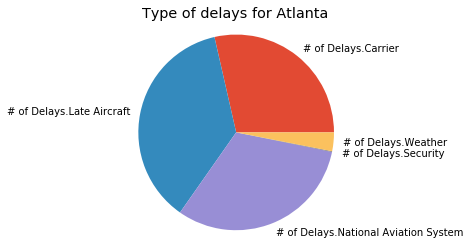

In [40]:
a = toptypeofdelay['# of Delays.Carrier']
b = toptypeofdelay['# of Delays.Late Aircraft']
c = toptypeofdelay['# of Delays.National Aviation System']
d = toptypeofdelay['# of Delays.Security']
e = toptypeofdelay['# of Delays.Weather']
labels = ['# of Delays.Carrier', '# of Delays.Late Aircraft','# of Delays.National Aviation System', '# of Delays.Security','# of Delays.Weather']
plt.pie([a, b, c, d, e], labels = labels)
plt.title('Type of delays for Atlanta')
plt.axis('equal')

In [41]:
bottomtypeofdelay = typeofdelays.sort_values('Domestic passengers', ascending=False).tail(n=1)

In [42]:
bottomtypeofdelay = bottomtypeofdelay.drop(['Domestic passengers'],axis=1)

(-1.118160504102707,
 1.1008647859096528,
 -1.1359963746443755,
 1.1150276425562997)

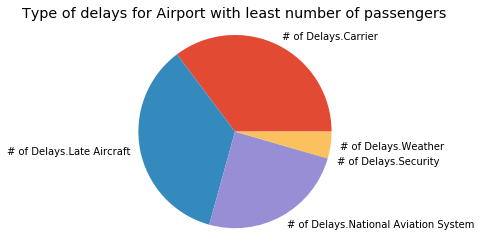

In [43]:
a = bottomtypeofdelay['# of Delays.Carrier']
b = bottomtypeofdelay['# of Delays.Late Aircraft']
c = bottomtypeofdelay['# of Delays.National Aviation System']
d = bottomtypeofdelay['# of Delays.Security']
e = bottomtypeofdelay['# of Delays.Weather']
labels = ['# of Delays.Carrier', '# of Delays.Late Aircraft','# of Delays.National Aviation System', '# of Delays.Security','# of Delays.Weather']
plt.pie([a, b, c, d, e], labels = labels)
plt.title('Type of delays for Airport with least number of passengers')
plt.axis('equal')

### Training:

In [44]:
data_train = pd.read_csv('airport.csv')

In [45]:
data_train = data_train.drop(['Month','Month Name', 'Name', 'Primary key', 'Airport speed','Year','Label'], axis =1)
data_train.head()

,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Cancelled,Carriers.Total,Code,Delayed,Diverted,Flights.Total,PerCentage Delay,# Delay Per Carrier,Minutes Per Delayed Flight,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,On Time,Domestic passengers
0,1009,1275,3217,17,328,216,11,ATL,5843,27,30060,0.194378,531.181818,45.997604,61606,68335,118831,518,268764,19474,23974,3171845
1,374,495,685,3,66,138,14,BOS,1623,3,9639,0.168378,115.928571,47.545903,20319,28189,24400,99,77167,4160,7875,841934
2,296,477,389,8,78,29,11,BWI,1245,15,8287,0.150235,113.181818,51.791165,13635,26810,17556,278,64480,6201,6998,871736
3,300,472,735,2,54,73,11,CLT,1562,14,8670,0.180161,142.000000,42.167093,14763,23379,23804,127,65865,3792,7021,957352
4,283,268,487,4,58,74,13,DCA,1100,18,6513,0.168893,84.615385,47.951818,13775,13712,20999,120,52747,4141,5321,595820


In [46]:
x = data_train[data_train.columns[0:20]]
y = data_train['Domestic passengers']

In [47]:
#K-fold:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import scale, StandardScaler



In [48]:
folds = KFold(n_splits = 10, shuffle = False)
for train_index, test_index in folds.split(data_train):
    print([train_index.shape[0], test_index.shape[0]])

[3967, 441]
[3967, 441]
[3967, 441]
[3967, 441]
[3967, 441]
[3967, 441]
[3967, 441]
[3967, 441]
[3968, 440]
[3968, 440]


In [49]:
#Standardizing:
category = x.select_dtypes(include=['object'])
x = x.drop(['Code'], axis = 1)
x1 = x
cols = x.columns

In [50]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x) 

In [51]:
corr_dict = {}
for c in cols:
    corr_dict[c] = abs(x1[c].corr(data_train['Domestic passengers']))
print (corr_dict)

{'# of Delays.Carrier': 0.8128997621750476, '# of Delays.Late Aircraft': 0.7854288561397608, '# of Delays.National Aviation System': 0.6250573626845044, '# of Delays.Security': 0.23202926946935798, '# of Delays.Weather': 0.5841230990131022, 'Cancelled': 0.4084060360603957, 'Carriers.Total': 0.2461951466571251, 'Delayed': 0.7777694129361287, 'Diverted': 0.4424875241133632, 'Flights.Total': 0.9358588310141203, 'PerCentage Delay': 0.02495445799767057, '# Delay Per Carrier': 0.7456031883850934, 'Minutes Per Delayed Flight': 0.2217963822137557, 'Minutes Delayed.Carrier': 0.8471011558637942, 'Minutes Delayed.Late Aircraft': 0.7403955356476227, 'Minutes Delayed.National Aviation System': 0.5035532096034666, 'Minutes Delayed.Security': 0.2581859280707774, 'Minutes Delayed.Total': 0.7199814256538987, 'Minutes Delayed.Weather': 0.5665805608232576}


In [52]:
import operator
sortedcorr_dict = sorted(corr_dict.items(), key= operator.itemgetter(1))
sortedcorr_dict

[('PerCentage Delay', 0.02495445799767057),
 ('Minutes Per Delayed Flight', 0.2217963822137557),
 ('# of Delays.Security', 0.23202926946935798),
 ('Carriers.Total', 0.2461951466571251),
 ('Minutes Delayed.Security', 0.2581859280707774),
 ('Cancelled', 0.4084060360603957),
 ('Diverted', 0.4424875241133632),
 ('Minutes Delayed.National Aviation System', 0.5035532096034666),
 ('Minutes Delayed.Weather', 0.5665805608232576),
 ('# of Delays.Weather', 0.5841230990131022),
 ('# of Delays.National Aviation System', 0.6250573626845044),
 ('Minutes Delayed.Total', 0.7199814256538987),
 ('Minutes Delayed.Late Aircraft', 0.7403955356476227),
 ('# Delay Per Carrier', 0.7456031883850934),
 ('Delayed', 0.7777694129361287),
 ('# of Delays.Late Aircraft', 0.7854288561397608),
 ('# of Delays.Carrier', 0.8128997621750476),
 ('Minutes Delayed.Carrier', 0.8471011558637942),
 ('Flights.Total', 0.9358588310141203)]

### Even though we get maximum correlation between Domestic passengers and Flights.Total, our main aim is to see the correlation of various delays with respect to Number of passengers.
### Therefore, we apply regression models with other parameters.

In [53]:
model = linear_model.LinearRegression()
scores = cross_val_score(model, X = data_train[['Domestic passengers']], y = data_train['Minutes Delayed.Carrier'], cv = folds)
print(scores)
print([scores.mean(), scores.std()])

[0.65331235 0.74857303 0.66946582 0.61334616 0.75426218 0.6750225
 0.69606332 0.70955616 0.73654139 0.74644918]
[0.7002592087269484, 0.04488597242793757]


In [54]:
# train and test simple linear regression model
model = linear_model.LinearRegression().fit(X = data_train[['Domestic passengers']], y = data_train['Minutes Delayed.Carrier'])
r_squared = model.score(X = data_train[['Domestic passengers']], y = data_train['Minutes Delayed.Carrier'])
print(r_squared)

0.7175803682657766


[Text(0,0.5,'Minutes Delayed.Carrier'),
 Text(0.5,0,'Domestic passengers'),
 Text(0.5,1,'Relation between Number of passengers and Minutes delayed due to carrier fault')]

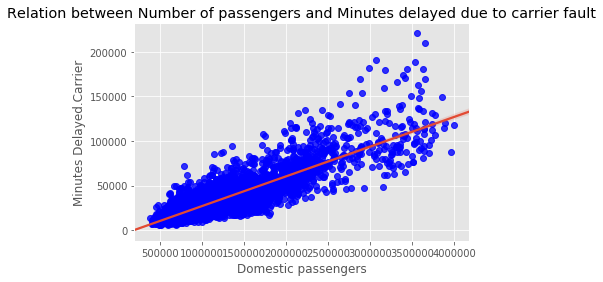

In [55]:
ax = sns.regplot(data_train['Domestic passengers'], data_train['Minutes Delayed.Carrier'], scatter_kws={'color':'blue'})
ax.set(title = 'Relation between Number of passengers and Minutes delayed due to carrier fault', xlabel = 'Domestic passengers', ylabel = 'Minutes Delayed.Carrier')

In [56]:
model = linear_model.LinearRegression()
scores = cross_val_score(model, X = data_train[['Domestic passengers']], y = data_train['# of Delays.Carrier'], cv = folds)
print(scores)
print([scores.mean(), scores.std()])

[0.68204079 0.66136709 0.46983836 0.52913616 0.75263867 0.63971444
 0.5609048  0.70887006 0.69471214 0.62999212]
[0.6329214642600182, 0.08351584472900772]


In [57]:
# train and test simple linear regression model
model = linear_model.LinearRegression().fit(X = data_train[['Domestic passengers']], y = data_train['# of Delays.Carrier'])
r_squared = model.score(X = data_train[['Domestic passengers']], y = data_train['# of Delays.Carrier'])
print(r_squared)

0.6608060233442492


[Text(0,0.5,'# of Delays.Carrier'),
 Text(0.5,0,'Domestic passengers'),
 Text(0.5,1,'Relation between Number of passengers and # of Delays.Carrier')]

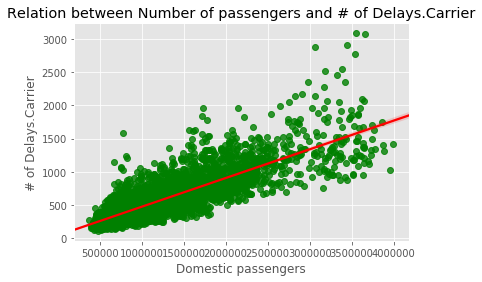

In [58]:
ax = sns.regplot(data_train['Domestic passengers'], data_train['# of Delays.Carrier'], line_kws={'color': 'red'}, scatter_kws={'color':'green'})
ax.set(title = 'Relation between Number of passengers and # of Delays.Carrier', xlabel = 'Domestic passengers', ylabel = '# of Delays.Carrier')

### Predicting correlation of Delayed(which means total delay) with respect to all the other variables

In [59]:
datatrain_delay = pd.read_csv('airport.csv')

In [60]:
datatrain_delay.head()

,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Cancelled,Carriers.Total,Code,Delayed,Diverted,Flights.Total,PerCentage Delay,# Delay Per Carrier,Minutes Per Delayed Flight,Label,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Month,Month Name,Name,On Time,Year,Primary key,Airport speed,Domestic passengers
0,1009,1275,3217,17,328,216,11,ATL,5843,27,30060,0.194378,531.181818,45.997604,2003/06,61606,68335,118831,518,268764,19474,6,June,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",23974,2003,ATL62003,M,3171845
1,374,495,685,3,66,138,14,BOS,1623,3,9639,0.168378,115.928571,47.545903,2003/06,20319,28189,24400,99,77167,4160,6,June,"Boston, MA: Logan International",7875,2003,BOS62003,M,841934
2,296,477,389,8,78,29,11,BWI,1245,15,8287,0.150235,113.181818,51.791165,2003/06,13635,26810,17556,278,64480,6201,6,June,"Baltimore, MD: Baltimore/Washington Internatio...",6998,2003,BWI62003,M,871736
3,300,472,735,2,54,73,11,CLT,1562,14,8670,0.180161,142.000000,42.167093,2003/06,14763,23379,23804,127,65865,3792,6,June,"Charlotte, NC: Charlotte Douglas International",7021,2003,CLT62003,M,957352
4,283,268,487,4,58,74,13,DCA,1100,18,6513,0.168893,84.615385,47.951818,2003/06,13775,13712,20999,120,52747,4141,6,June,"Washington, DC: Ronald Reagan Washington National",5321,2003,DCA62003,M,595820


In [61]:
x = datatrain_delay
x = x.drop(['Delayed'], axis=1)
y = datatrain_delay['Delayed']

In [62]:
folds = KFold(n_splits = 10, shuffle = False)
for train_index, test_index in folds.split(datatrain_delay):
    print([train_index.shape[0], test_index.shape[0]])

[3967, 441]
[3967, 441]
[3967, 441]
[3967, 441]
[3967, 441]
[3967, 441]
[3967, 441]
[3967, 441]
[3968, 440]
[3968, 440]


In [63]:
#Standardizing:
category = x.select_dtypes(include=['object'])
x = x.drop(['Code','Month','Month Name', 'Name', 'Primary key', 'Airport speed','Year','Label'], axis = 1)
x1 = x
cols = x.columns

In [64]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x) 

In [65]:
corr_dict = {}
for c in cols:
    corr_dict[c] = abs(x1[c].corr(datatrain_delay['Delayed']))
print (corr_dict)

{'# of Delays.Carrier': 0.8619845911318409, '# of Delays.Late Aircraft': 0.9066462986789853, '# of Delays.National Aviation System': 0.9275463585279979, '# of Delays.Security': 0.31369806598971944, '# of Delays.Weather': 0.8044099731667502, 'Cancelled': 0.6789813265110847, 'Carriers.Total': 0.30570088702398135, 'Diverted': 0.5492385702403891, 'Flights.Total': 0.8513938465865962, 'PerCentage Delay': 0.4971029165880667, '# Delay Per Carrier': 0.9508758766648289, 'Minutes Per Delayed Flight': 0.4179133704245529, 'Minutes Delayed.Carrier': 0.8838510167171663, 'Minutes Delayed.Late Aircraft': 0.9079362728372093, 'Minutes Delayed.National Aviation System': 0.8536599344367405, 'Minutes Delayed.Security': 0.31777749759401286, 'Minutes Delayed.Total': 0.9744037366480766, 'Minutes Delayed.Weather': 0.7852635617319473, 'On Time': 0.7335187310579547, 'Domestic passengers': 0.7777694129361286}


In [66]:
import operator
sortedcorr_dict = sorted(corr_dict.items(), key= operator.itemgetter(1))
sortedcorr_dict

[('Carriers.Total', 0.30570088702398135),
 ('# of Delays.Security', 0.31369806598971944),
 ('Minutes Delayed.Security', 0.31777749759401286),
 ('Minutes Per Delayed Flight', 0.4179133704245529),
 ('PerCentage Delay', 0.4971029165880667),
 ('Diverted', 0.5492385702403891),
 ('Cancelled', 0.6789813265110847),
 ('On Time', 0.7335187310579547),
 ('Domestic passengers', 0.7777694129361286),
 ('Minutes Delayed.Weather', 0.7852635617319473),
 ('# of Delays.Weather', 0.8044099731667502),
 ('Flights.Total', 0.8513938465865962),
 ('Minutes Delayed.National Aviation System', 0.8536599344367405),
 ('# of Delays.Carrier', 0.8619845911318409),
 ('Minutes Delayed.Carrier', 0.8838510167171663),
 ('# of Delays.Late Aircraft', 0.9066462986789853),
 ('Minutes Delayed.Late Aircraft', 0.9079362728372093),
 ('# of Delays.National Aviation System', 0.9275463585279979),
 ('# Delay Per Carrier', 0.9508758766648289),
 ('Minutes Delayed.Total', 0.9744037366480766)]

### Linear regression to find correlation between Delayed flights and Cancelled flights

In [67]:
model = linear_model.LinearRegression()
scores = cross_val_score(model, X = datatrain_delay[['Cancelled']], y = datatrain_delay['Delayed'], cv = folds)
print(scores)
print([scores.mean(), scores.std()])

[0.55318292 0.49166558 0.50607896 0.5276945  0.44047746 0.18845712
 0.22549738 0.41531543 0.09189779 0.27202646]
[0.3712293592690999, 0.15476674846128027]


In [68]:
# train and test simple linear regression model
model = linear_model.LinearRegression().fit(X = datatrain_delay[['Cancelled']], y = datatrain_delay['Delayed'])
r_squared = model.score(X = datatrain_delay[['Cancelled']], y = datatrain_delay['Delayed'])
print(r_squared)

0.4610156417507525


[Text(0,0.5,'Delayed'),
 Text(0.5,0,'Cancelled'),
 Text(0.5,1,'Relation between Delayed flights and cancelled flights')]

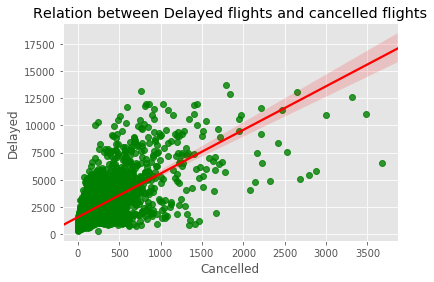

In [69]:
ax = sns.regplot(datatrain_delay['Cancelled'], datatrain_delay['Delayed'], line_kws={'color': 'red'}, scatter_kws={'color':'green'})
ax.set(title = 'Relation between Delayed flights and cancelled flights', xlabel = 'Cancelled', ylabel = 'Delayed')

### Linear regression to find relation between Delayed flights and Domestic passengers

In [70]:
model = linear_model.LinearRegression()
scores = cross_val_score(model, X = datatrain_delay[['Domestic passengers']], y = datatrain_delay['Delayed'], cv = folds)
print(scores)
print([scores.mean(), scores.std()])

[0.61941493 0.63424505 0.52196205 0.50258263 0.68302165 0.64439579
 0.4734967  0.57526923 0.62249523 0.15617779]
[0.5433061048308683, 0.14420479112380372]


In [71]:
# train and test simple linear regression model
model = linear_model.LinearRegression().fit(X = datatrain_delay[['Domestic passengers']], y = datatrain_delay['Delayed'])
r_squared = model.score(X = datatrain_delay[['Domestic passengers']], y = datatrain_delay['Delayed'])
print(r_squared)

0.6049252596990105


In [72]:
X = datatrain_delay[['Domestic passengers']]
y = datatrain_delay['Delayed']
adjusted_r_squared = 1 - (1-model.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_r_squared)

0.6048355922590873


### Multiple linear regression to find relation between delayed flights and Cancelled, diverted and Number of domestic passengers

In [73]:
model = linear_model.LinearRegression().fit(X = datatrain_delay[['Cancelled','Diverted','Domestic passengers']], y = datatrain_delay['Delayed'])
r_squared = model.score(X = datatrain_delay[['Cancelled','Diverted','Domestic passengers']], y = datatrain_delay['Delayed'])
print(r_squared)

0.7746273656165757


In [74]:
X = datatrain_delay[['Cancelled','Diverted','Domestic passengers']]
y = datatrain_delay['Delayed']
adjusted_r_squared = 1 - (1-model.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7744738420236715


### Classification:

### By dropping all the variables that have string values:

In [75]:
classifierknn = pd.read_csv('airport.csv')

In [76]:
change_values = {'F' : 2, 'M' : 1, 'S' : 0}
classifierknn['Airport speed'] = classifierknn['Airport speed'].map(change_values)
classifierknn = classifierknn.drop(['PerCentage Delay','# Delay Per Carrier','Minutes Per Delayed Flight'], axis=1)

In [77]:
x = classifierknn
x = x.drop('Airport speed',axis=1)
y = classifierknn['Airport speed']

In [78]:
#Standardizing:
category = x.select_dtypes(include=['object'])
category

,Code,Label,Month Name,Name,Primary key
0,ATL,2003/06,June,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",ATL62003
1,BOS,2003/06,June,"Boston, MA: Logan International",BOS62003
2,BWI,2003/06,June,"Baltimore, MD: Baltimore/Washington Internatio...",BWI62003
3,CLT,2003/06,June,"Charlotte, NC: Charlotte Douglas International",CLT62003
4,DCA,2003/06,June,"Washington, DC: Ronald Reagan Washington National",DCA62003
5,DEN,2003/06,June,"Denver, CO: Denver International",DEN62003
6,DFW,2003/06,June,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",DFW62003
7,DTW,2003/06,June,"Detroit, MI: Detroit Metro Wayne County",DTW62003
8,EWR,2003/06,June,"Newark, NJ: Newark Liberty International",EWR62003
9,FLL,2003/06,June,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",FLL62003


In [79]:
x = x.drop(['Code', 'Label', 'Month Name', 'Name', 'Primary key'], axis = 1)

In [80]:
cols = x.columns

corr_dict = {}
for c in cols:
    corr_dict[c] = abs(x[c].corr(y))

import operator
sortedcorr_dict = sorted(corr_dict.items(), key= operator.itemgetter(1))
sortedcorr_dict

[('Year', 0.03423828137712352),
 ('Carriers.Total', 0.05497035576301627),
 ('Month', 0.06709175175054366),
 ('Minutes Delayed.Security', 0.1448346704664254),
 ('# of Delays.Security', 0.15419809478958182),
 ('On Time', 0.1808059157226992),
 ('Domestic passengers', 0.28606313120923643),
 ('Flights.Total', 0.30099805116874434),
 ('Diverted', 0.4037640178576897),
 ('Cancelled', 0.4200498795130415),
 ('# of Delays.Carrier', 0.44587991033787067),
 ('Minutes Delayed.Carrier', 0.47951474252099063),
 ('# of Delays.Late Aircraft', 0.5025414013978983),
 ('# of Delays.Weather', 0.5061188734898842),
 ('Minutes Delayed.Weather', 0.5344832381684073),
 ('# of Delays.National Aviation System', 0.5380746953389),
 ('Minutes Delayed.National Aviation System', 0.5449426009129442),
 ('Minutes Delayed.Late Aircraft', 0.5572701521224495),
 ('Delayed', 0.5636264359580898),
 ('Minutes Delayed.Total', 0.598108309378941)]

### KNN using Minutes Delayed total, Delayed, Minutes Delayed Late Aircraft, Minutes Delayed National Aviation system, Minutes delayed weather

In [81]:
# partition dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(airport[['Minutes Delayed.Total', 'Delayed', 'Minutes Delayed.Late Aircraft', 'Minutes Delayed.National Aviation System','Minutes Delayed.Weather']],
                                                    airport['Airport speed'], test_size=0.25, random_state = 1)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 7)  
classifierKNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [83]:
y_pred = classifierKNN.predict(x_test) 

In [84]:
y_pred

array(['M', 'M', 'F', ..., 'M', 'M', 'S'], dtype=object)

In [85]:
from sklearn import metrics
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
print(confusionmatrix)

[[164  74   4]
 [ 70 496  39]
 [  4  76 175]]


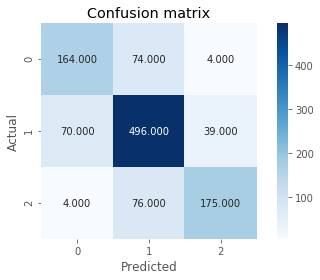

In [86]:
# plot confusion matrix
sns.heatmap(confusionmatrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [87]:
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.7577132486388385
0.2422867513611615
[0.68907563 0.76780186 0.80275229]
[0.67768595 0.81983471 0.68627451]
[0.68333333 0.79296563 0.73995772]


### KNN gives an accuracy of 75.77% for these features.

In [88]:
# for k in range (3,10,2):
#     classifierKNN = KNeighborsClassifier(n_neighbors = k)  
#     classifierKNN.fit(x_train, y_train)
#     y_pred = classifierKNN.predict(x_test)
#     print('for',k)
#     print(metrics.accuracy_score(y_test, y_pred)) # accuracy
#     print(1 - metrics.accuracy_score(y_test, y_pred)) # error
#     print(metrics.precision_score(y_test, y_pred, average = None)) # precision
#     print(metrics.recall_score(y_test, y_pred, average = None)) # recall
#     print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

### KNN using parameters: Delayed, Minutes Delayed Late Aircraft, Domestic passengers, Cancelled, Diverted

In [89]:
x_train, x_test, y_train, y_test = train_test_split(airport[['Minutes Delayed.Total', 'Delayed', 'Domestic passengers', 'Cancelled','Diverted']],
                                                    airport['Airport speed'], test_size=0.25, random_state = 1)

In [90]:
# for k in range (3,10,2):
#     classifierKNN = KNeighborsClassifier(n_neighbors = k)  
#     classifierKNN.fit(x_train, y_train)
#     y_pred = classifierKNN.predict(x_test)
#     print('for',k)
#     print(metrics.accuracy_score(y_test, y_pred)) # accuracy
#     print(1 - metrics.accuracy_score(y_test, y_pred)) # error
#     print(metrics.precision_score(y_test, y_pred, average = None)) # precision
#     print(metrics.recall_score(y_test, y_pred, average = None)) # recall
#     print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [91]:

classifierKNN = KNeighborsClassifier(n_neighbors = 9)  
classifierKNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [92]:
y_pred = classifierKNN.predict(x_test)

In [93]:
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
print(confusionmatrix)

[[153  89   0]
 [ 67 499  39]
 [  8  77 170]]


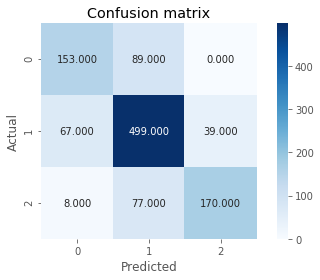

In [94]:
# plot confusion matrix
sns.heatmap(confusionmatrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [95]:
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.7459165154264973
0.2540834845735027
[0.67105263 0.75037594 0.81339713]
[0.6322314  0.82479339 0.66666667]
[0.65106383 0.78582677 0.73275862]


### Accuracy comes out to be 74.59%

### SVM

### For parameters 'Minutes Delayed.Total', 'Delayed', 'Minutes Delayed.Late Aircraft', 'Minutes Delayed.National Aviation System','Minutes Delayed.Weather'

In [96]:
# partition dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(airport[['Minutes Delayed.Total', 'Delayed', 'Minutes Delayed.Late Aircraft', 'Minutes Delayed.National Aviation System','Minutes Delayed.Weather']],
                                                    airport['Airport speed'], test_size=0.25, random_state = 1)

In [97]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

In [98]:
from sklearn.svm import SVC
Svm = SVC(random_state=0)
from sklearn.model_selection import GridSearchCV
parameters= [{'C':[1,10,100,100], 'kernel': ['rbf', 'linear']}]
gridsearch = GridSearchCV(estimator=Svm, param_grid = parameters, scoring='accuracy', cv=10)
gridSearch = gridsearch.fit(x_train, y_train)


In [185]:
print(gridSearch.best_score_,gridSearch.best_params_)

0.8006654567453115 {'C': 100, 'kernel': 'rbf'}


In [186]:
finalSVM= SVC(kernel='rbf', C=100, random_state = 0)
finalSVM.fit(x_train, y_train)
y_pred = finalSVM.predict(x_test)

In [188]:
y_pred = finalSVM.predict(x_test)
print(y_pred)

['M' 'S' 'F' ... 'F' 'M' 'S']


In [189]:
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
print(confusionmatrix)

[[180  60   2]
 [ 53 525  27]
 [  6  72 177]]


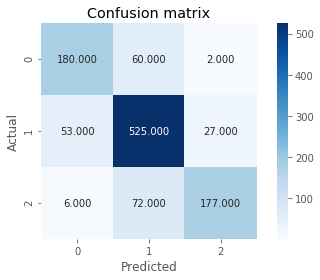

In [190]:
# plot confusion matrix
sns.heatmap(confusionmatrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [191]:
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.8003629764065335
0.19963702359346647
[0.75313808 0.79908676 0.8592233 ]
[0.74380165 0.8677686  0.69411765]
[0.74844075 0.83201268 0.76789588]


### Accuracy : 80.03%

### SVM for parameters: 'Minutes Delayed.Total', 'Delayed', 'Domestic passengers', 'Cancelled','Diverted'

In [213]:
x_train, x_test, y_train, y_test = train_test_split(airport[['Minutes Delayed.Total','Delayed', 'Domestic passengers', 'Cancelled','Diverted']],
                                                    airport['Airport speed'], test_size=0.25, random_state = 1)

In [214]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

In [215]:
from sklearn.svm import SVC
Svm = SVC(random_state=0)
from sklearn.model_selection import GridSearchCV
parameters= [{'C':[1,10,100,100], 'kernel': ['rbf', 'linear']}]
gridsearch = GridSearchCV(estimator=Svm, param_grid = parameters, scoring='accuracy', cv=10)
gridSearch = gridsearch.fit(x_train, y_train)
print(gridSearch.best_score_,gridSearch.best_params_)

0.8103448275862069 {'C': 10, 'kernel': 'rbf'}


In [216]:
SVM= SVC(kernel='rbf', C=10, random_state = 0)
SVM.fit(x_train, y_train)
y_pred = SVM.predict(x_test)

In [217]:
y_pred = SVM.predict(x_test)
print(y_pred)

['M' 'M' 'F' ... 'F' 'M' 'S']


In [218]:
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
print(confusionmatrix)

[[172  69   1]
 [ 51 528  26]
 [  3  78 174]]


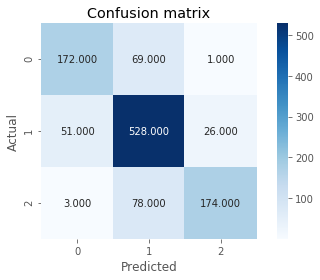

In [219]:
# plot confusion matrix
sns.heatmap(confusionmatrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [220]:
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.7931034482758621
0.2068965517241379
[0.76106195 0.78222222 0.86567164]
[0.7107438  0.87272727 0.68235294]
[0.73504274 0.825      0.76315789]


### Accuracy comes out to be 79.31%